In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
import librosa

In [21]:
# Find the cosine similarity between two matrices
# i.e. cos(theta)
def cosine_similarity(m1, m2):
    # reshape matrices in the case they do not
    # have the same shape
    if m1.shape != m2.shape:
        min_val = min(m1.shape[1], m2.shape[1])
        m1 = m1[:, :min_val]
        m2 = m2[:, :min_val]
    
    flat1 = m1.flatten()
    flat2 = m2.flatten()
    return 1 - cosine(flat1, flat2)

In [22]:
def chroma_similarity(path1, path2):
    '''
    path1 - path to first .wav file
    path2 - path to second .wav file
    '''

    y1, sr1 = librosa.load(path1)
    y2, sr2 = librosa.load(path2)

    # duration will be used to create a ratio to ensure
    # both matrices have the same shape
    chroma1_duration = librosa.core.audio.get_duration(y=y1, sr=sr1)
    chroma2_duration = librosa.core.audio.get_duration(y=y2, sr=sr2)
    hop_length = int(512 * (chroma2_duration/chroma1_duration))
    
    # hop_length determines the "step size" for each stft, we are making
    # it such that we have the same number of frames in the two chromagrams
    chroma1 = librosa.feature.chroma_stft(y=y1, sr=sr1)
    chroma2 = librosa.feature.chroma_stft(y=y2, sr=sr2, hop_length=hop_length) 

    return cosine_similarity(chroma1, chroma2)

In [23]:
path1 = 'chords/BMajor.wav'
path2 = 'chords/CMajorScale.wav'
print(chroma_similarity(path1=path1, path2=path2))

0.4453161358833313


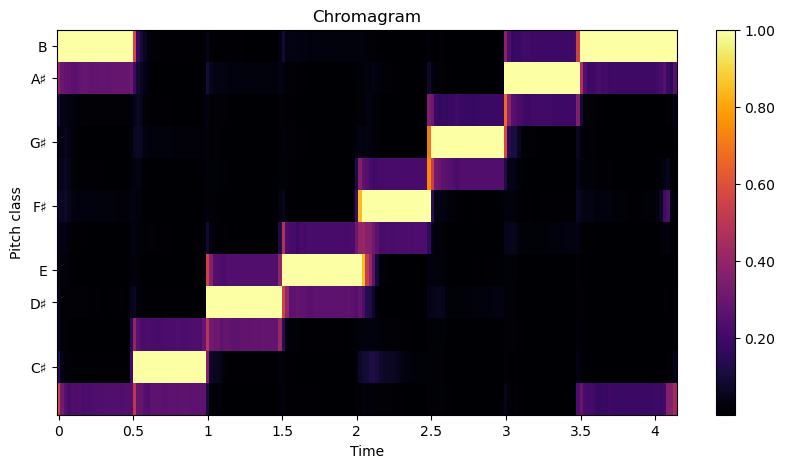

In [24]:
# Load audio and extract chromagram
y, sr = librosa.load("chords/BMajor.wav")
b_chromagram = librosa.feature.chroma_stft(y=y, sr=sr) 

b_tempo, b_beats = librosa.beat.beat_track(y=y, sr=sr)
b_beats = librosa.util.fix_frames(b_beats, x_min=0)
b_chroma_sync = librosa.util.sync(b_chromagram, b_beats, aggregate=np.median)
b_beat_times = librosa.samples_to_time(b_beats)

# Used later to adjust hop length for the next audio clip so both 
# chromagrams share the same shape
b_duration = librosa.core.audio.get_duration(S=b_chromagram, sr=sr)


# Visualize the chromagram (optional)
plt.figure(figsize=(10, 5))
librosa.display.specshow(b_chromagram, x_axis="time", y_axis="chroma", 
                         cmap="inferno", key='B:major')
plt.title("Chromagram")
plt.colorbar(format="%.2f")
plt.show()

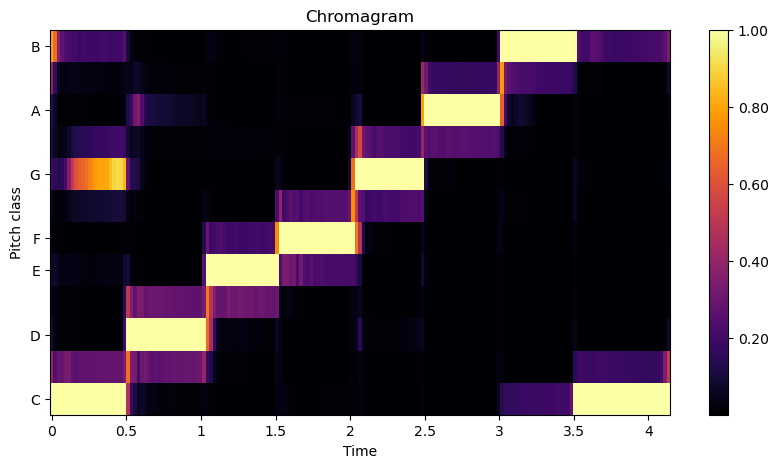

In [25]:
# Load audio and extract chromagram
y, sr = librosa.load("chords/CMajorScale.wav")
c_duration = librosa.core.audio.get_duration(y=y, sr=sr)
hop_length = int(512 * (c_duration/b_duration))
c_chromagram = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop_length) 

c_tempo, c_beats = librosa.beat.beat_track(y=y, sr=sr)
c_beats = librosa.util.fix_frames(c_beats, x_min=0)
c_chroma_sync = librosa.util.sync(c_chromagram, c_beats, aggregate=np.median)
c_beat_times = librosa.samples_to_time(c_beats)

# Visualize the chromagram (optional)
plt.figure(figsize=(10, 5))
librosa.display.specshow(c_chromagram, x_axis="time", y_axis="chroma", cmap="inferno")
plt.title("Chromagram")
plt.colorbar(format="%.2f")
plt.show()

In [26]:
print(b_chromagram.shape)
print(c_chromagram.shape)

(12, 179)
(12, 179)


In [27]:
print(cosine_similarity(b_chromagram, c_chromagram))
print(cosine_similarity(b_chromagram, b_chromagram))

0.4453161358833313
1


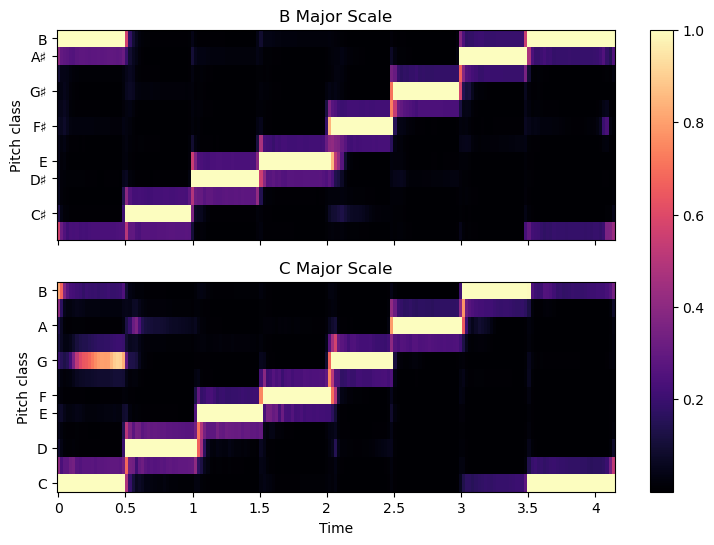

In [28]:
fig, ax = plt.subplots(nrows=2, sharex=True)
fig.set_size_inches((9, 6))
img = librosa.display.specshow(b_chromagram, y_axis='chroma', x_axis='time', 
                               ax=ax[0], key='B:maj')
ax[0].set(title='B Major Scale')
ax[0].label_outer()

librosa.display.specshow(c_chromagram, y_axis='chroma', x_axis='time',
                         ax=ax[1], key='C:maj')
ax[1].set(title='C Major Scale')
fig.colorbar(img, ax=ax)

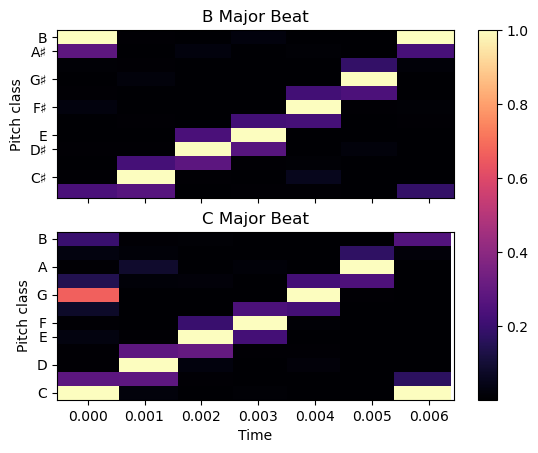

In [29]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(b_chroma_sync, y_axis='chroma', x_axis='time', 
                               ax=ax[0], x_coords=b_beat_times, key='B:maj')
ax[0].set(title='B Major Beat')
ax[0].label_outer()

librosa.display.specshow(c_chroma_sync, y_axis='chroma', x_axis='time',
                         x_coords=c_beat_times, ax=ax[1], key='C:maj')
ax[1].set(title='C Major Beat')
fig.colorbar(img, ax=ax)